# Spaceship Titanic dataset (Kaggle)


Variables description:

- `PassengerId`: unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
 
- `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
 
- `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- `Cabin`: The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- `deck`, `num`, `side`: The deck, num and side information from **Cabin** column.
  
- `Destination`: The planet the passenger will be debarking to.

- `Age`: The age of the passenger.
  
- `VIP`: Whether the passenger has paid for special VIP service during the voyage.

- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- `Name`: The first and last names of the passenger.

- `Transported`: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

-  `group`: The group the passenger is travelling with.

- `group_n`: The number within the group (people in the same group are often family members, but not always).

- `group_size`: The size of the group the passenger is travellin with (integer: 1 to 8).

- `group_size_bin`: The size of the group the passenger is travellin with (category: "g1", "g2", "g3", "g4more", for 1, 2, 3 or 4-or-more, respectively).

- `amenities_sum`, `amenities_mean`, `amenities_min`, `amenities_max`: The sum, mean, minimum and maximum of luxury amenities (from columns **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck**)

- `amenities_sum_bin`: The discrete intervals of **amenities_sum** column, where *low*=0, *medium*=(0,1450], *high*=(1450,np.inf]. The value "1450" is the 3rd quartile of **amenities_sum**.

# Load libraries

In [1]:
from pathlib import Path
import sys
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #, SGDClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

np.random.seed(123)

# Python version
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
# Load the dataset
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe."""
    return pd.read_csv(path / filename)

# Load dataset
dataset_path = Path().absolute() / "data"
filename = "train.csv"
data_loaded = load_ds(dataset_path, filename)
print(f"Shape: {data_loaded.shape}")

Shape: (8693, 14)


In [3]:
print(data_loaded.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [4]:
data_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Split train and test set

In [5]:
X_y_train, X_y_test  = train_test_split(data_loaded, test_size=0.2, random_state=123, shuffle=True)

print(f"shape data: {data_loaded.shape}")

print(f"\n{data_loaded.shape[0]} * 0.8 = {data_loaded.shape[0] * 0.8}")
print(f"shape X_y_train: {X_y_train.shape}")

print(f"\n{data_loaded.shape[0]} * 0.2 = {data_loaded.shape[0] * 0.2}")
print(f"shape X_y_test:  {X_y_test.shape}")

shape data: (8693, 14)

8693 * 0.8 = 6954.400000000001
shape X_y_train: (6954, 14)

8693 * 0.2 = 1738.6000000000001
shape X_y_test:  (1739, 14)


In [6]:
# NOTE: "drop()" create a copy of the data original dataset
X_train = X_y_train.drop(["Transported"], axis=1)
y_train = X_y_train.loc[:, "Transported"].copy()

# NOTE: "drop()" create a copy of the data original dataset
X_test = X_y_test.drop(["Transported"], axis=1)
y_test = X_y_test.loc[:, "Transported"].copy()

print(f"shape X_train: {X_train.shape}")
print(f"shape y_train: {y_train.shape}")

print(f"shape X_test: {X_test.shape}")
print(f"shape y_test: {y_test.shape}")

shape X_train: (6954, 13)
shape y_train: (6954,)
shape X_test: (1739, 13)
shape y_test: (1739,)


# Define pipelines

In [7]:
# Define columns to convert
c_cat = ["HomePlanet", "Cabin", "Destination"]
c_str = ["PassengerId", "Name"]
# c_bool = ["CryoSleep", "VIP"]

In [8]:
# Function to convert data type & add column
def convert_df(df_in: pd.DataFrame,
               col_cat: list[str],
               col_str: list[str],
               # col_bool: list[str]
 ) -> pd.DataFrame:
    """Converts the specified columns to categorical, string or bool types."""

    df_out = df_in.copy()

    for column in col_cat:
        df_out[column] = df_out[column].astype("category")
    
    for column in col_str:
        df_out[column] = df_out[column].astype("string")

    # NOTE: EXCLUDED because "SimpleImputer" does not support data with dtype bool
    # for column in col_bool:
    #     df_out[column] = df_out[column].astype("bool")

    return df_out

## CombinedAttributesAdder

Define a class that transforms and select various features.

In [9]:
# TransformerMixin: add method ".fit_transform()"
# BaseEstimator: add methods ".get_params()" and ".set_params()"
# We need 3 methods:
# 1) .fit()
# 2) .transform()
# 3) .fit_transform() (provided by "TransformerMixin")
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # avoid '*args' or "**kargs" in "__init__"
    def __init__(self):
        pass

    # fit is needed later for the pipilene
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Convert column type
        X = convert_df(
            df_in=X,
            col_cat=c_cat,
            col_str=c_str,
            #col_bool=c_bool,
        )

        # Add "group" and "group_n"
        X[["group", "group_n"]] = X.PassengerId.str.split("_", expand=True)

        # Add "group_size" (a column with the size of the group)
        count_group_size = (
             X
             .value_counts(["group"], sort=False)
             .rename("group_size")
             .reset_index()
        )
        X = pd.merge(X, count_group_size, how="left", on="group")

        # Add "group_size_bin"
        X.loc[:, "group_size_bin"] = np.nan
        X.loc[X.group_size == 1, "group_size_bin"] = "g1"
        X.loc[X.group_size == 2, "group_size_bin"] = "g2"
        X.loc[X.group_size == 3, "group_size_bin"] = "g3"
        X.loc[X.group_size >= 4, "group_size_bin"] = "g4more"
        X["group_size_bin"] = X["group_size_bin"].astype("category")

        # Add "deck", "num" and "side"
        X[["deck", "num", "side"]] = X.Cabin.str.split("/", expand=True)
        X["deck"] = X["deck"].astype("category")
        X["num"] = X["num"].astype("string")
        X["side"] = X["side"].astype("category")
        
        # Add "amenities_sum"
        X["amenities_sum"] = X[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

        # Add "amenities_sum_bin"
        bins = [-np.inf, 0, 1450, np.inf]
        names = ["low", "medium", "high"]
        X.loc[:, "amenities_sum_bin"] = pd.cut(X.amenities_sum, bins=bins, labels=names)

        # Drop unused columns
        cols_to_drop = ['PassengerId', 'Cabin', 'RoomService', 'FoodCourt',
                        'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'group',
                        'group_n', 'group_size', 'num', 'amenities_sum']
        X.drop(columns=cols_to_drop, inplace=True)

        return X

In [10]:
p1 = CombinedAttributesAdder()
df_test = p1.fit_transform(X_train)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 0 to 6953
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   HomePlanet         6789 non-null   category
 1   CryoSleep          6782 non-null   object  
 2   Destination        6805 non-null   category
 3   Age                6809 non-null   float64 
 4   VIP                6800 non-null   object  
 5   group_size_bin     6954 non-null   category
 6   deck               6795 non-null   category
 7   side               6795 non-null   category
 8   amenities_sum_bin  6954 non-null   category
dtypes: category(6), float64(1), object(2)
memory usage: 259.1+ KB


In [11]:
pd.isna(df_test).sum(axis=0)

HomePlanet           165
CryoSleep            172
Destination          149
Age                  145
VIP                  154
group_size_bin         0
deck                 159
side                 159
amenities_sum_bin      0
dtype: int64

## num_pipeline

It preprocesses the numerical attributes with `SimpleImputer()` and `StandardScaler()`.

In [12]:
print(df_test.describe())

               Age
count  6809.000000
mean     28.767367
std      14.479764
min       0.000000
25%      19.000000
50%      27.000000
75%      37.000000
max      79.000000


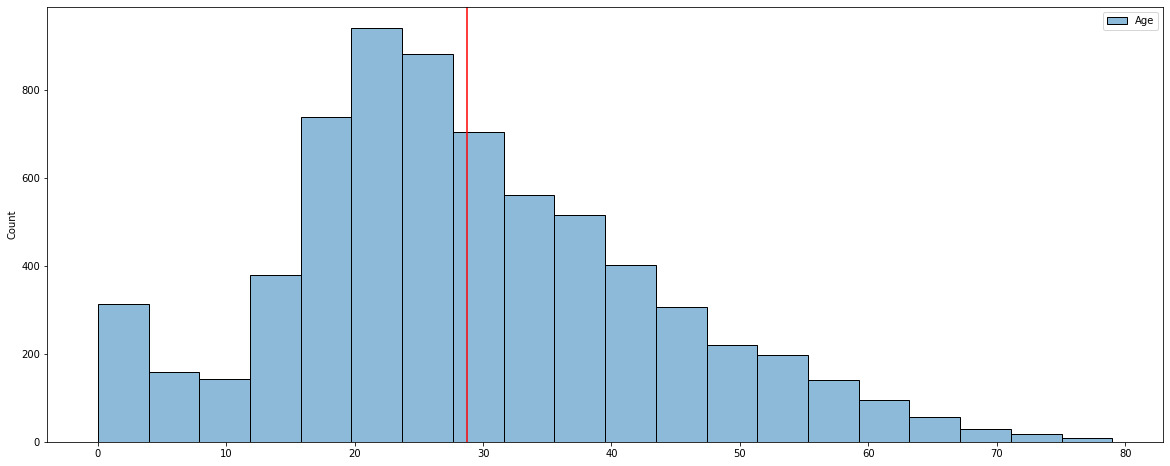

In [13]:
plt.figure(figsize=(20, 8))
sns.histplot(df_test.loc[:, ["Age"]], bins=20)
plt.axvline(df_test.Age.mean(), color='red')
plt.show()

In [14]:
# All (except the last) estimators must be transformers (i.e., they
# must have a ".fit_transform()" method).
num_pipeline = Pipeline([
    # replace NA with mean
    ('imputer', SimpleImputer(strategy='mean')),
    # standardize the variables: z = (x - mean) / SD
    ('std_scaler', StandardScaler())])

In [15]:
age = num_pipeline.fit_transform(df_test.loc[:, ["Age"]])
print(f"Shape: {age.shape}")
print(f"number of NaN: {np.sum(np.isnan(age))}")

Shape: (6954, 1)
number of NaN: 0


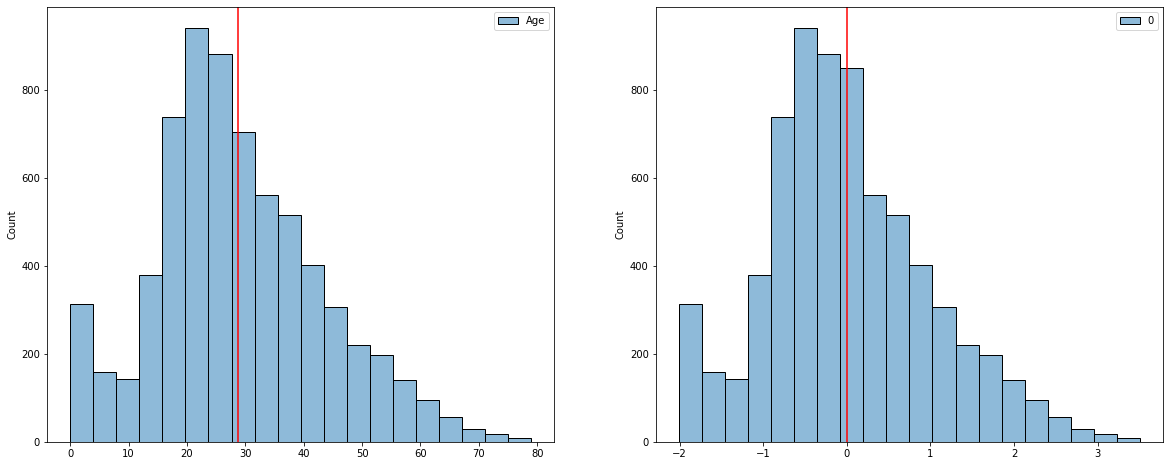

In [16]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.histplot(df_test.loc[:, ["Age"]], bins=20)
plt.axvline(df_test.Age.mean(), color='red')
plt.subplot(122)
sns.histplot(age, bins=20)
plt.axvline(age.mean(), color='red')
plt.show()

## cat_pipeline

It preprocesses the categorical attributed with `SimpleImputer()` and `OneHotEncoder()`.

In [17]:
# All (except the last) estimators must be transformers (i.e., they
# must have a ".fit_transform()" method).
cat_pipeline = Pipeline([
    # replace NA with mode
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # apply "OneHotEncoder()"
    ('one_hot', OneHotEncoder())])

In [18]:
pd.isna(df_test).sum(axis=0)

HomePlanet           165
CryoSleep            172
Destination          149
Age                  145
VIP                  154
group_size_bin         0
deck                 159
side                 159
amenities_sum_bin      0
dtype: int64

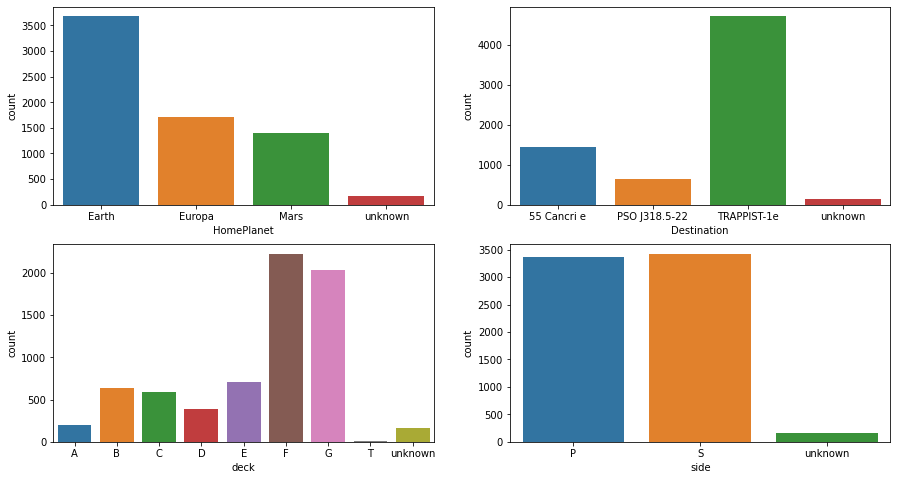

In [19]:
cat_with_nan = ["HomePlanet", "Destination", "deck", "side"]

plt.figure(figsize=(15 ,8))
for i, feature in enumerate(cat_with_nan):
    plot_me = (
        df_test.loc[:, feature]
       .value_counts(dropna=False)
       .rename("count")
       .reset_index()
       .rename(columns={"index":feature})
    )
    plot_me[plot_me.columns[0]] = (
        plot_me[plot_me.columns[0]]
        .cat
        .add_categories("unknown")
        .fillna("unknown")
    )
    plt.subplot(2, 2, i+1)
    sns.barplot(data=plot_me, x=feature, y="count")
plt.show()

In [20]:
cat_test = cat_pipeline.fit_transform(df_test.loc[:, ["HomePlanet"]])
print(f"Shape: {df_test.HomePlanet.shape}")
print(f"Shape: {cat_test.shape}")

Shape: (6954,)
Shape: (6954, 3)


## Combine pipelines

In [21]:
list_num_attribs = ['Age']
list_cat_attribs = ["HomePlanet", "CryoSleep", "Destination", "VIP",
                    "group_size_bin", "deck", "side", "amenities_sum_bin"]

In [22]:
# ColumnTransformer requires tuples with:
# - a name
# - a transformer
# - a list of names (or indices) of columns to which the transformer is applied

cols_transformer = ColumnTransformer([
    # apply "num_pipeline" to numerical columns
    ('num', num_pipeline, list_num_attribs),
    # apply "cat_pipeline" to categorical columns
    ('cat', cat_pipeline, list_cat_attribs)
    ])

In [23]:
full_pipeline = Pipeline([
    # transform/add columns
    ('attribs_adder', CombinedAttributesAdder()),
    # Transform numerical and categorical attributes
    ("cols_transformer", cols_transformer)])

In [24]:
# print(full_pipeline.get_params().keys())
# print(full_pipeline.get_params().items())
print(full_pipeline.get_params())


{'memory': None, 'steps': [('attribs_adder', CombinedAttributesAdder()), ('cols_transformer', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot', OneHotEncoder())]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'group_size_bin', 'deck', 'side',
                                  'amenities_sum_bin'])]))], 'verbose': False, 'attribs_adder': CombinedAttributesAdder(), 'cols_transformer': ColumnTransformer(transformers=[('num',
 

In [25]:
for i in full_pipeline.get_params().keys():
    print(i)

memory
steps
verbose
attribs_adder
cols_transformer
cols_transformer__n_jobs
cols_transformer__remainder
cols_transformer__sparse_threshold
cols_transformer__transformer_weights
cols_transformer__transformers
cols_transformer__verbose
cols_transformer__verbose_feature_names_out
cols_transformer__num
cols_transformer__cat
cols_transformer__num__memory
cols_transformer__num__steps
cols_transformer__num__verbose
cols_transformer__num__imputer
cols_transformer__num__std_scaler
cols_transformer__num__imputer__add_indicator
cols_transformer__num__imputer__copy
cols_transformer__num__imputer__fill_value
cols_transformer__num__imputer__keep_empty_features
cols_transformer__num__imputer__missing_values
cols_transformer__num__imputer__strategy
cols_transformer__num__imputer__verbose
cols_transformer__num__std_scaler__copy
cols_transformer__num__std_scaler__with_mean
cols_transformer__num__std_scaler__with_std
cols_transformer__cat__memory
cols_transformer__cat__steps
cols_transformer__cat__verbo

# Baseline model

In [26]:
clf_baseline = LogisticRegression()

In [27]:
clf_baseline = Pipeline([
    # Pre-processing pipeline
    ("preparation", full_pipeline),
    # Logistic regression (with default paramenters)
    ("log_reg", LogisticRegression(random_state=123))])

In [28]:
clf_baseline.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('attribs_adder', CombinedAttributesAdder()),
                                 ('cols_transformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('std_scaler',
                                                                                    StandardScaler())]),
                                                                   ['Age']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one_hot',
                                                                                    OneHotEncoder())]),
                                                                   ['HomePlanet',
                                                                    'CryoSleep',
                                                                    'Destination',
                                                                    'VIP',
                                                                    'group_size_bin',
                                                                    'deck',
                                                                    'side',
                                                                    'amenities_sum_bin'])]))])),
                ('log_reg', LogisticRegression(random_state=123))])

In [29]:
y_pred_baseline = clf_baseline.predict(X_train)

In [30]:
accuracy_score(y_train, y_pred_baseline)

0.7364106988783434

In [31]:
cm_baseline = confusion_matrix(y_train, y_pred_baseline)
cm_baseline

array([[2802,  662],
       [1171, 2319]], dtype=int64)

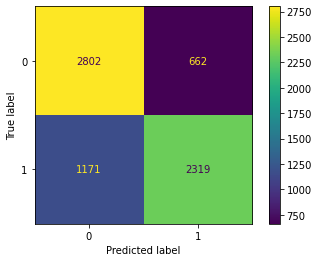

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline)
disp.plot()
plt.show()